In [1]:
import json
import numpy as np
import os
import pandas as pd
import gmaps
import gmaps.datasets
import pytz
from datetime import datetime
from ipywidgets.embed import embed_minimal_html

GMAPS_API_KEY = "<INSERT GMAPS API KEY HERE>"


strava_activities_f = open("./strava_activities.json")
strava_activities_json = json.loads(strava_activities_f.read())

strava_df = pd.DataFrame(strava_activities_json["activities"])
gps_activities = strava_df[strava_df["has_gps"] == True]

coordinates = gps_activities[["activity_id", "activity_stream"]]

count = 0
min_lat = 39
max_lat = 42
min_lon = -75
max_lon = -73
lon_len = 10000
lat_len = 10000

lat_step = (max_lat-min_lat)/lat_len
lon_step = (max_lon-min_lon)/lon_len

# Lon = np.arange(min_lon, max_lon, lon_step)
# Lat = np.arange(min_lat, max_lat, lat_step)

# counts = np.zeros((lat_len, lon_len))

locations_with_weights = {}

c = 0
locations_raw = []
start_locations = []
for _, activity in coordinates.iterrows():
    is_first_act = True
    c += 1

    for gps_point in activity["activity_stream"]:
        curr_lat = gps_point[0]
        curr_lon = gps_point[1]
        if is_first_act:
            timestamp = gps_activities.loc[gps_activities["activity_id"] == activity["activity_id"], "timestamp_start"].iloc[0]
            start_locations.append({
                "latitude": curr_lat,
                "longitude": curr_lon,
                "timestamp_start": datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S %Z").astimezone(pytz.timezone("America/New_York"))
            })
            is_first_act = False
       
        locations_raw.append({
            "latitude": curr_lat,
            "longitude": curr_lon
        })

        if curr_lon > min_lon and curr_lon < max_lon and curr_lat > min_lat and curr_lat < max_lat:
            key = (round((curr_lat - min_lat) / lat_step)*lat_step+min_lat, round((curr_lon - min_lon) / lon_step)*lon_step+min_lon)
            if key in locations_with_weights:
                locations_with_weights[key] += 1
            else:
                locations_with_weights[key] = 1
    
locs = []
for lat, lon in locations_with_weights:
    locs.append({
        "latitude": lat,
        "longitude": lon,
        "count": locations_with_weights[(lat, lon)]
    })


df_all = pd.DataFrame(locs)
df_raw = pd.DataFrame(locations_raw)
df_start = pd.DataFrame(start_locations)
print(df_raw.head())

gmaps.configure(api_key=GMAPS_API_KEY)

fig_all = gmaps.figure(center=(40.775, -73.975), zoom_level=11, map_type="SATELLITE")
heatmap_layer_all = gmaps.heatmap_layer(
    df_raw[["latitude", "longitude"]],
    max_intensity=25, point_radius=4.0
)

fig_all.add_layer(heatmap_layer_all)

fig_all




   latitude  longitude
0  39.18794  -84.34774
1  39.18787  -84.34763
2  39.18785  -84.34754
3  39.18785  -84.34739
4  39.18791  -84.34724


Figure(layout=FigureLayout(height='420px'))

In [59]:

fig_start = gmaps.figure(center=(40.775, -73.975), zoom_level=12)
heatmap_layer_start = gmaps.heatmap_layer(
    df_start[["latitude", "longitude"]],
    max_intensity=10, point_radius=10.0
)
fig_start.add_layer(heatmap_layer)
fig_start

Figure(layout=FigureLayout(height='420px'))

In [86]:

gps_activities

,has_gps,athlete_id,timestamp_start,activity_id,title,elapsed_time_minutes,activity_type,distance,pace,activity_stream,elevation_gain
0,True,55006593,2020-05-30 21:10:37 UTC,3538458592,5 mile repeats,52.25,run,"{'value': 7.47, 'unit': 'miles'}","{'value': '7:00', 'unit': 'minutes per mile'}","[[39.18794, -84.34774], [39.18787, -84.34763],...",NaN
1,True,55006593,2020-05-29 21:27:28 UTC,3532748511,Afternoon Run,38.97,run,"{'value': 5.0, 'unit': 'miles'}","{'value': '7:47', 'unit': 'minutes per mile'}","[[39.16828, -84.36122], [39.16811, -84.36104],...",NaN
2,True,55006593,2020-05-28 14:15:29 UTC,3526096893,Morning Run,122.00,run,"{'value': 16.0, 'unit': 'miles'}","{'value': '7:39', 'unit': 'minutes per mile'}","[[39.17117, -84.29958], [39.17122, -84.29968],...",NaN
4,True,55006593,2020-05-27 13:34:42 UTC,3520183715,Morning Run,62.00,run,"{'value': 8.0, 'unit': 'miles'}","{'value': '7:46', 'unit': 'minutes per mile'}","[[39.11527, -84.41092], [39.11529, -84.41102],...",NaN
5,True,55006593,2020-05-26 21:16:15 UTC,3517077419,Afternoon Run,34.55,run,"{'value': 4.61, 'unit': 'miles'}","{'value': '7:30', 'unit': 'minutes per mile'}","[[39.16827, -84.3612], [39.1682, -84.36108], [...",NaN
...,...,...,...,...,...,...,...,...,...,...,...
413,True,55006593,2021-02-04 16:29:24 UTC,4734270456,Lunch Run,73.00,run,"{'value': 9.0, 'unit': 'miles'}","{'value': '8:10', 'unit': 'minutes per mile'}","[[40.80242, -73.96219], [40.80247, -73.9622], ...",NaN
416,True,55006593,2021-03-03 22:05:02 UTC,4886153337,Afternoon Run,54.10,run,"{'value': 6.99, 'unit': 'miles'}","{'value': '7:44', 'unit': 'minutes per mile'}","[[40.80214, -73.96118], [40.8021, -73.9611], [...",NaN
418,True,55006593,2021-03-02 12:49:17 UTC,4876710041,Morning Run,9.52,run,"{'value': 1.29, 'unit': 'miles'}","{'value': '7:20', 'unit': 'minutes per mile'}","[[40.78931, -73.9624], [40.78932, -73.96245], ...",NaN
419,True,55006593,2021-03-02 12:07:06 UTC,4876602443,Morning Run,32.55,run,"{'value': 4.74, 'unit': 'miles'}","{'value': '6:51', 'unit': 'minutes per mile'}","[[40.80222, -73.9615], [40.80219, -73.9614], [...",NaN


In [99]:
curr_activity = gps_activities.loc[gps_activities["activity_id"] == "3532748511", "timestamp_start"].iloc[0]
curr_activity

'2020-05-29 21:27:28 UTC'

<AxesSubplot:ylabel='count'>

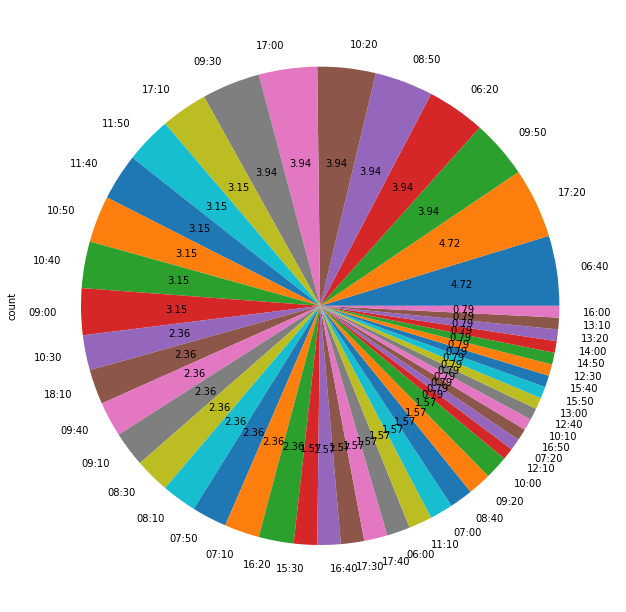

In [5]:
import matplotlib 

start_df = pd.DataFrame(start_locations)

start_df = start_df.set_index("timestamp_start")

start_df = start_df.loc[(start_df.index > "2020-01-01")]  # Filter by workouts this year


count = pd.Series([1 for x in range(len(start_df))])

start_df["count"] = count.values

start_df.index = start_df.index.round("10min")
pd.set_option("max_rows", 100)


grouped_time =start_df.groupby([start_df.index.hour, start_df.index.minute]).count()[["count"]].sort_values(by=["count"], ascending=False)



formatted_time_s = pd.Series(["{}:{}".format(str(grouped_time.index[x][0]-4).zfill(2), str(grouped_time.index[x][1]).zfill(2)) for x in range(len(grouped_time))])
grouped_time["formatted"] = formatted_time_s.values

pie_df = grouped_time.set_index("formatted")
pie_df["count"].plot(kind="pie", autopct='%.2f', figsize=(11, 11))




In [263]:
print(len(df_raw))

81634
